# Uber New York Data Analysis
Weekly challenge: Week 12  
Date: 10/10/2022

-- Data collection (Raw)  
-- Data cleaning (Data preparation)  
-- EDA (Exp. Data Analysis)  
-- Conclusion / Inference

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for data visualization
# import plotly.express as px # for data visualization

# from plotly.offline import init_notebook_mode # for data visualization
# init_notebook_mode(connected = True)

import warnings
warnings.filterwarnings('ignore')

In [3]:
file = r"C:\Users\unpat\_Projects\Challenge_AprojectAweek_data_files\Week_12/uber-raw-data-janjune-15.csv"
uber_15 = pd.read_csv(file, encoding = 'utf-8')
uber_15.head(3)

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID
0,B02617,2015-05-17 09:47:00,B02617,141
1,B02617,2015-05-17 09:47:00,B02617,65
2,B02617,2015-05-17 09:47:00,B02617,100


In [4]:
uber_15.shape

(14270479, 4)

In [5]:
# Checking for duplicate rows
uber_15.duplicated().sum()

898225

In [6]:
# Dropping the duplicate rows
uber_15.drop_duplicates(inplace = True)

In [7]:
uber_15.shape

(13372254, 4)

**Which month has maximum Uber pickups in New York city?**  
We have to find:  
-- month of max pickups  
-- count of pickups

In [8]:
uber_15.dtypes

Dispatching_base_num    object
Pickup_date             object
Affiliated_base_num     object
locationID               int64
dtype: object

In [9]:
uber_15['Pickup_date'] = pd.to_datetime(uber_15['Pickup_date'], format = '%Y-%m-%d %H:%M:%S')

In [10]:
uber_15['Pickup_date'].dtypes

dtype('<M8[ns]')

In [12]:
uber_15['month'] = uber_15['Pickup_date'].dt.month

<AxesSubplot:>

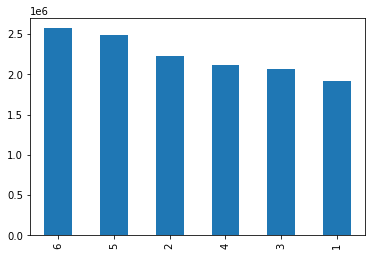

In [14]:
uber_15['month'].value_counts().plot(kind = 'bar')

From the above plot, we can see that June had the maximum Uber pickups in New York city.

**Find out total trips for each month & each weekdays**  
We need info on:  
month, weekday, count  
Jan    Fri      10k  
Jan    Sat      11k  
..  
..  
Feb    Fri      15k  
..  

In [15]:
uber_15['weekday'] = uber_15['Pickup_date'].dt.day_name()
uber_15['day'] = uber_15['Pickup_date'].dt.day
uber_15['hour'] = uber_15['Pickup_date'].dt.hour
uber_15['month'] = uber_15['Pickup_date'].dt.month
uber_15['minute'] = uber_15['Pickup_date'].dt.minute
uber_15.head(3)

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID,month,weekday,day,hour,minute
0,B02617,2015-05-17 09:47:00,B02617,141,5,Sunday,17,9,47
1,B02617,2015-05-17 09:47:00,B02617,65,5,Sunday,17,9,47
2,B02617,2015-05-17 09:47:00,B02617,100,5,Sunday,17,9,47


In [16]:
uber_15.groupby(['month','weekday']).size()

month  weekday  
1      Friday       339285
       Monday       190606
       Saturday     386049
       Sunday       230487
       Thursday     330319
       Tuesday      196574
       Wednesday    245650
2      Friday       373550
       Monday       274948
       Saturday     368311
       Sunday       296130
       Thursday     335603
       Tuesday      287260
       Wednesday    286387
3      Friday       309631
       Monday       269931
       Saturday     314785
       Sunday       313865
       Thursday     277026
       Tuesday      320634
       Wednesday    256767
4      Friday       315002
       Monday       238429
       Saturday     324545
       Sunday       273560
       Thursday     372522
       Tuesday      250632
       Wednesday    338015
5      Friday       430134
       Monday       255501
       Saturday     464298
       Sunday       390391
       Thursday     337607
       Tuesday      290004
       Wednesday    316045
6      Friday       371225
       Mond

In [18]:
temp = uber_15.groupby(['month','weekday'], as_index = False).size()
temp.head()

,month,weekday,size
0,1,Friday,339285
1,1,Monday,190606
2,1,Saturday,386049
3,1,Sunday,230487
4,1,Thursday,330319


In [19]:
temp['month'].unique()

array([1, 2, 3, 4, 5, 6], dtype=int64)

In [20]:
dict_month = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun'}

In [21]:
temp['month'] = temp['month'].map(dict_month)

In [22]:
temp.head()

,month,weekday,size
0,Jan,Friday,339285
1,Jan,Monday,190606
2,Jan,Saturday,386049
3,Jan,Sunday,230487
4,Jan,Thursday,330319


<AxesSubplot:xlabel='month', ylabel='size'>

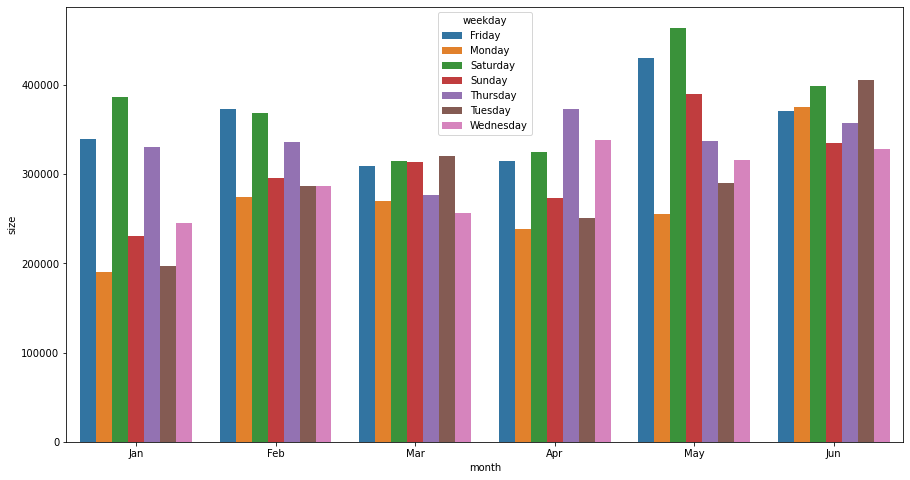

In [27]:
plt.figure(figsize = (15, 8))
sns.barplot(x = 'month', y = 'size', hue = 'weekday', data = temp)

The above plot shows the total trips for each month & each weekday

**Find out hourly rush in New York city on all days**  
We need info on:  
weekday, hour, total rides  